# Tokenization

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
sentences = ['I love my dog',
            'I love my cat',
            'You love my dog!']

In [7]:
tokenizer = Tokenizer(num_words=100) # store most frequent 100 words...

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index

print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


---

# Turning sentences into data

In [10]:
sentences = ['I love my dog',
            'I love my cat',
            'You love my dog!',
            'Do you think my dog is amazing']


tokenizer = Tokenizer(num_words = 100)

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index



# Sequences
sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print('\n')
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}


[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


### How does this respond to unknown words though?

In [12]:
test_data = ['i really love my dog',
            'my dog loves my manatee']

test_seq = tokenizer.texts_to_sequences(test_data)

print(test_seq)

[[4, 2, 1, 3], [1, 3, 1]]


### You'll notice that a 5 word sentence ends up as a 4 word sequence....same for the other one...

### Because the word 'really' was not in the word_index...

---

## In order to not lose the length of the sequence....same no. of tokens as words....

## We use the "\<oov>" token property in the Tokenizer object

In [14]:
sentences = ['I love my dog',
            'I love my cat',
            'You love my dog!',
            'Do you think my dog is amazing']


tokenizer = Tokenizer(num_words = 100, oov_token = "<oov>") # im guessing its "Out Of Vocabulary"...

                                                          # This creates 'a' token for words not in the 
                                                          # vocabulary...

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index



test_data = ['i really love my dog',
            'my dog loves my manatee']

test_seq = tokenizer.texts_to_sequences(test_data)


print(word_index)
print(test_seq)



{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


### Also, when it comes to training a neural network, the input should be of the same length...

### Introducing..... Padding....

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


sentences = ['I love my dog',
            'I love my cat',
            'You love my dog!',
            'Do you think my dog is amazing']


tokenizer = Tokenizer(num_words = 100, oov_token = "<oov>")

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index



# Sequences
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)

print(word_index)
print('\n')
print(sequences)
print('\n')
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


### Want post padding?.....Easy...

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


sentences = ['I love my dog',
            'I love my cat',
            'You love my dog!',
            'Do you think my dog is amazing']


tokenizer = Tokenizer(num_words = 100, oov_token = "<oov>")

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index



# Sequences
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post')

print(word_index)
print('\n')
print(sequences)
print('\n')
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


### If you dont want the length of the padded sentences to be the same as the longest sentence...


### You can also specify if you want to truncate from the beginning or the end using truncating = 'post' 

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


sentences = ['I love my dog',
            'I love my cat',
            'You love my dog!',
            'Do you think my dog is amazing']


tokenizer = Tokenizer(num_words = 100, oov_token = "<oov>")

tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index



# Sequences
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post', maxlen = 5, truncating = 'post')

print(word_index)
print('\n')
print(sequences)
print('\n')
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


---

# Training a model to recognize sentiment in text

In [43]:
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




# with open('Sarcasm_Headlines_Dataset_v2.json', 'r') as f:
#     datastore = json.load(f)

df = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
    
    
sentences = df['headline'].to_list()

labels = df['is_sarcastic'].to_list()

urls = df['article_link'].to_list()


# for item in datastore:
#     sentences.append(df['headline'])
#     labels.append(df['is_sarcastic'])
#     urls.append(df['article_link'])
    
    
    
tokenizer = Tokenizer(oov_token = "<oov>")

# Tokenizing text...
tokenizer.fit_on_texts(sentences)

# Word index...
word_index = tokenizer.word_index


# Turning our sentences into sequences of tokens and padding them...
sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding = 'post')



print(padded[0])
print(padded.shape)

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
(28619, 152)


In [44]:
vocab_size = 10000

embedding_dim = 16

max_length = 100

trunc_type='post'

padding_type='post'

oov_tok = "<OOV>"

training_size = 20000

### Splitting into training and testing...

In [52]:
import numpy as np

training_sentences = sentences[0:training_size]
training_sentences = np.array(training_sentences)

testing_sentences = sentences[training_size:]
testing_sentences = np.array(testing_sentences)

training_labels = labels[0:training_size]
training_labels = np.array(training_labels)

testing_labels = labels[training_size:]
testing_labels = np.array(testing_labels)

### There's a bit of a problem here....if we want to test the model's effectiveness, we have to use the tokenizer object that has only seen the training data...

### Re-writing the code

In [53]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)


word_index = tokenizer.word_index


training_sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(training_sequences, maxlen = max_length,
                               padding = padding_type, truncating = trunc_type)



testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                              padding = padding_type, truncating = trunc_type)

## "Not bad, a bit meh"

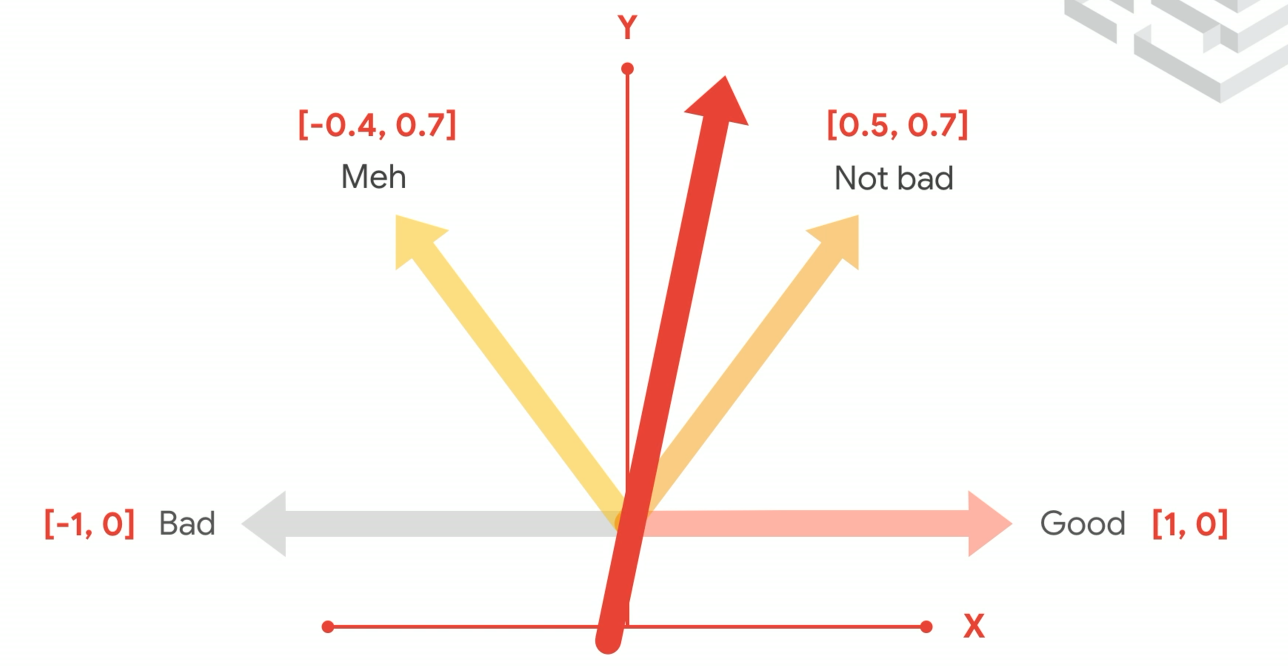

## The concept of Embedding

### When we have a fully trained network, and we give it a bunch of words, it could look up the vectors of these words, sum them up and thus give us an idea for the sentiment

## The neural network

In [54]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length), # The top layer is an embedding
                                                                                     # where the direction of each word will 
                                                                                     # be learned epoch by epoch...
    
    tf.keras.layers.GlobalAveragePooling1D(), # Adding up the vectors...
    
    tf.keras.layers.Dense(24, activation = 'relu'), # then fed into a common deep neural network
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Training

In [55]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6585 - accuracy: 0.6138 - val_loss: 0.5397 - val_accuracy: 0.8084
Epoch 2/30
625/625 - 1s - loss: 0.4182 - accuracy: 0.8359 - val_loss: 0.3751 - val_accuracy: 0.8390
Epoch 3/30
625/625 - 1s - loss: 0.3155 - accuracy: 0.8741 - val_loss: 0.3428 - val_accuracy: 0.8528
Epoch 4/30
625/625 - 1s - loss: 0.2650 - accuracy: 0.8981 - val_loss: 0.3295 - val_accuracy: 0.8575
Epoch 5/30
625/625 - 1s - loss: 0.2307 - accuracy: 0.9129 - val_loss: 0.3325 - val_accuracy: 0.8520
Epoch 6/30
625/625 - 1s - loss: 0.2039 - accuracy: 0.9232 - val_loss: 0.3385 - val_accuracy: 0.8509
Epoch 7/30
625/625 - 1s - loss: 0.1822 - accuracy: 0.9326 - val_loss: 0.3438 - val_accuracy: 0.8522
Epoch 8/30
625/625 - 1s - loss: 0.1642 - accuracy: 0.9403 - val_loss: 0.3548 - val_accuracy: 0.8527
Epoch 9/30
625/625 - 1s - loss: 0.1478 - accuracy: 0.9470 - val_loss: 0.3776 - val_accuracy: 0.8460
Epoch 10/30
625/625 - 1s - loss: 0.1350 - accuracy: 0.9526 - val_loss: 0.3913 - val_accuracy: 0.8446

# Establish sentiment for new sentences...

In [58]:
sentence = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen = max_length,
                      padding = padding_type,
                      truncating = trunc_type)

print(model.predict(padded))

[[7.3750937e-01]
 [1.9043824e-05]]


---

# ML with Recurrent Neural Network

Typically, a Recurrent neuron is drawn like this...

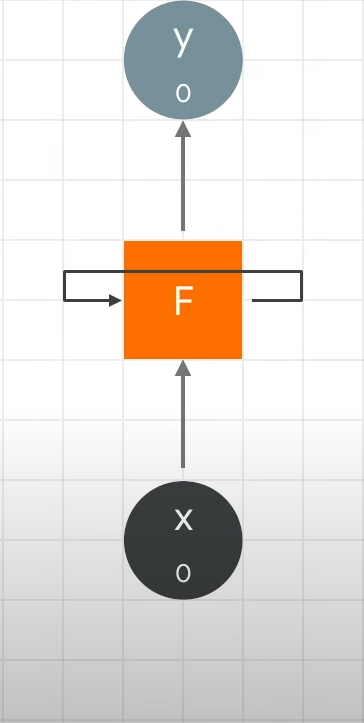

## There is a function that gets an input value that produces an output value,

## In addition to this output, it also produces another feed-forward value that gets passed to the next neuron

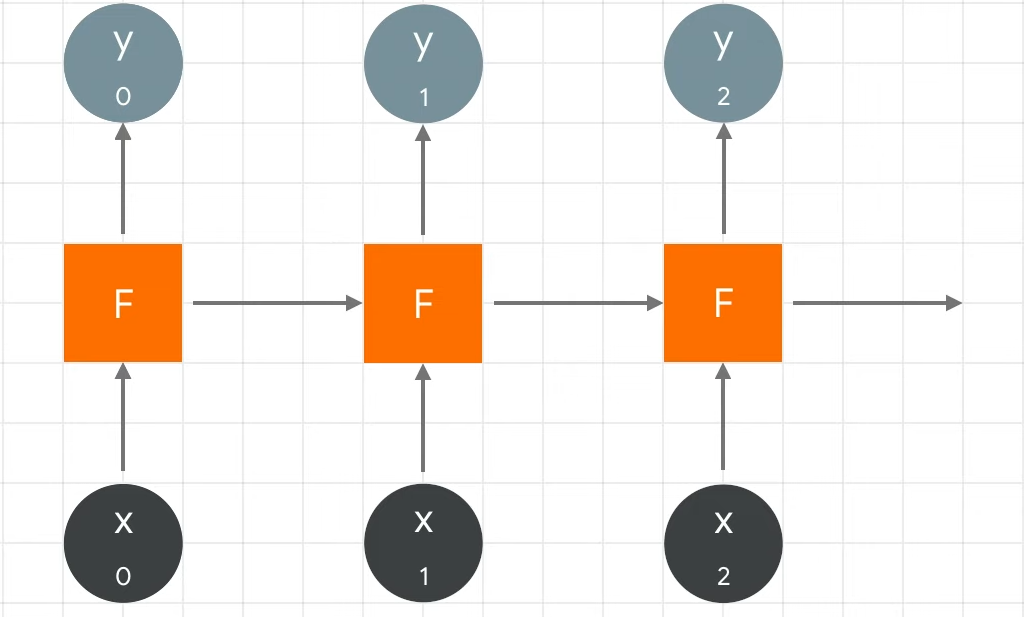

## In layer with X1, the function gets the X1 value along with the fed forward value from the previous neuron and calculates y1

---

# Generating lyrics .....Irish

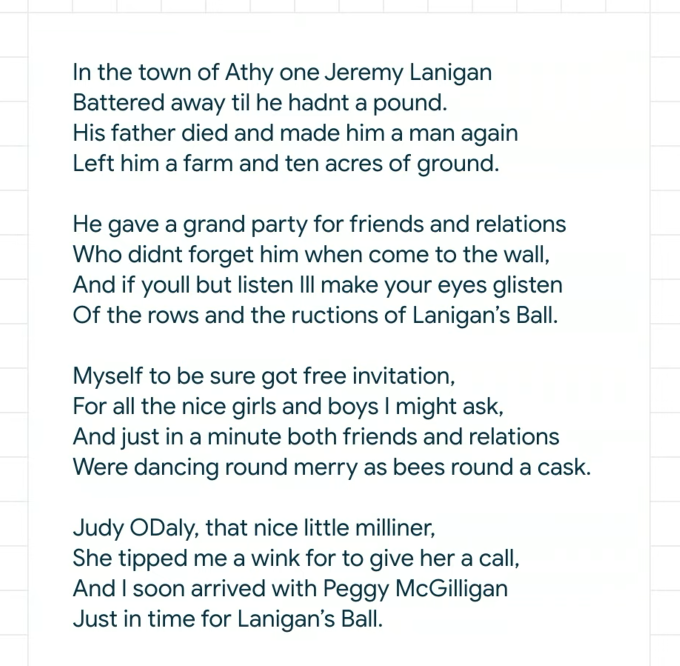

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
data = open('Irish.txt').read()

In [3]:
data[:100]

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep yo'

In [4]:
# Initializing tokenizer
tokenizer = Tokenizer()

In [5]:
# Corpus data
corpus = data.lower().split('\n')

In [6]:
corpus[:5]

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing']

In [7]:
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

## Notice the + 1, its because we're gonna use an out of vocabulary token...

# Why not use an oov_token instead?

## Its because there is a subtle difference between generating text and classifying text. When generating text, we dont need a validation set, we're gonna use every bit we have to try and spot the patterns of where and how words occur.

## So if we tokenize the entire corpus, there will be, by definition, no out of vocabulary token. 

## We'll pad sub-sentences from the full corpus in the upcoming cells, and for that we'll need some kind of a zero token, so we'll add one here, counting that token as a valid word.

---

# Preparing Training data...

In [8]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0] # texts_to_sequences takes list, indexing 1st list inside list...
                                                         # [[51, 12, 96, 1217, 48, 2, 69]] -> [51, 12, 96, 1217, 48, 2, 69]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

Till line 3
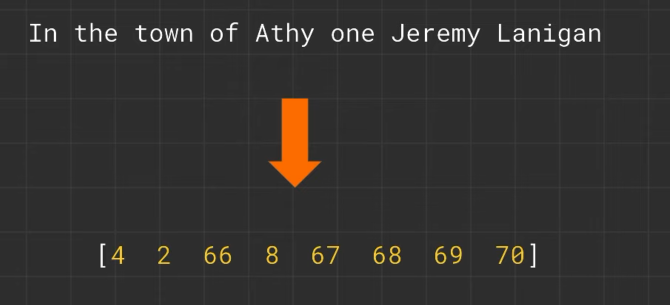

2nd for loop...

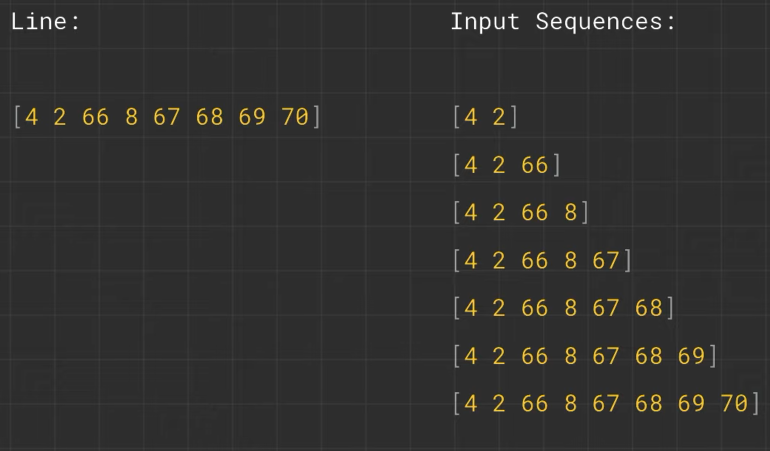

## The reason we're doing this is because we want to train the model to predict the likely next word.

---

In [9]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences]) # we start by finding the len of the longest sentence
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

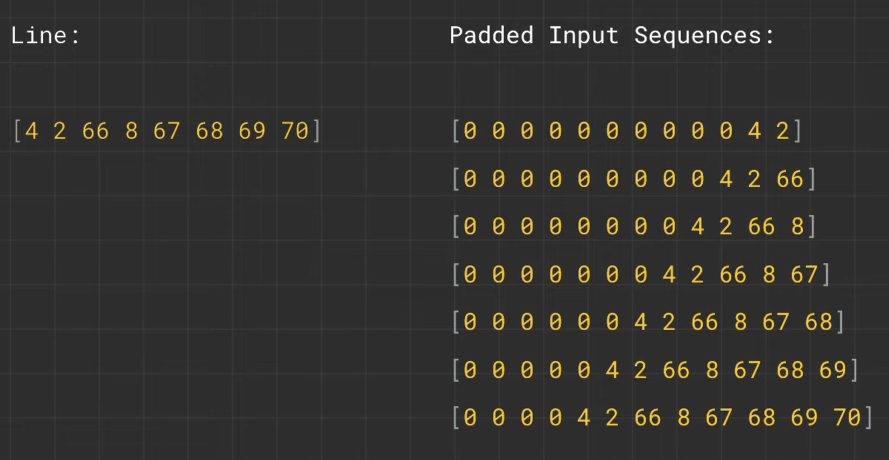

## Now the data is ideal to give us features and labels...

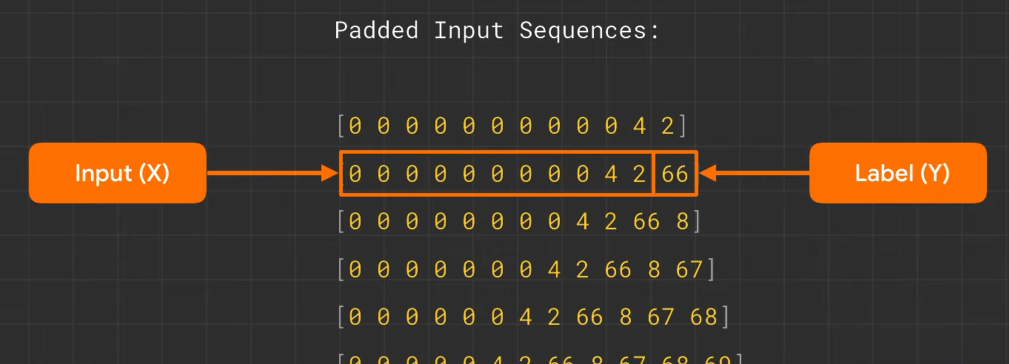

## Everything but the last value will be our X, and the last value will be y

In [10]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

## Also, we want our y to be categorical and one hot encoded...

## So that when we train, we'll be able to predict across all of the words in our corpus, which one is the most likely word to be next in the  sequence given the current set of words.

In [30]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

One-Hot Encoded 70
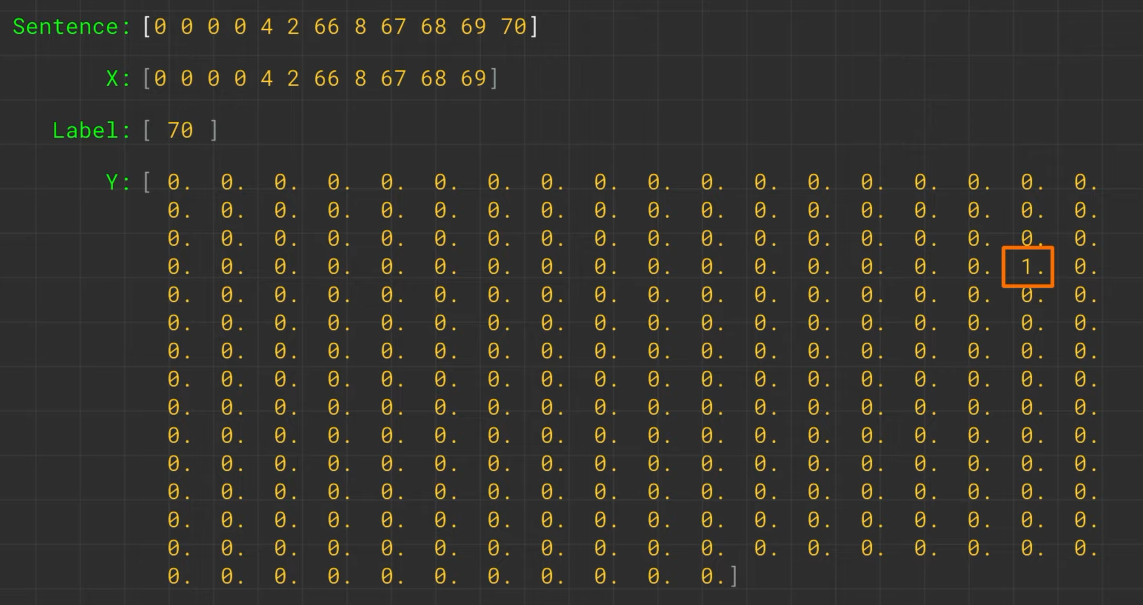

In [32]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [33]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [34]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [35]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [36]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

## Training a neural network with all of the data...

### The first parameter in the embedding layer is the number of unique words on the corpus and the input_length is the maximum_sequence_len - 1  ......because we made labels....

In [37]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(150)))

# Output is a dense with the total number of words...
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)

#print model.summary()
print(model)

D:\Anaconda\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
377/377 [==============================] - 25s 47ms/step - loss: 6.6417 - accuracy: 0.0741
Epoch 2/100
377/377 [==============================] - 13s 34ms/step - loss: 5.7626 - accuracy: 0.1138
Epoch 3/100
377/377 [==============================] - 13s 35ms/step - loss: 4.8935 - accuracy: 0.1644
Epoch 4/100
377/377 [==============================] - 14s 36ms/step - loss: 4.0091 - accuracy: 0.2296
Epoch 5/100
377/377 [==============================] - 12s 31ms/step - loss: 3.2308 - accuracy: 0.3256
Epoch 6/100
377/377 [==============================] - 12s 31ms/step - loss: 2.5807 - accuracy: 0.4242
Epoch 7/100
377/377 [==============================] - 14s 38ms/step - loss: 2.0541 - accuracy: 0.5251
Epoch 8/100
377/377 [==============================] - 12s 31ms/step - loss: 1.7139 - accuracy: 0.5915
Epoch 9/100
377/377 [==============================] - 11s 30ms/step - loss: 1.4390 - accuracy: 0.6564
Epoch 10/100
377/377 [==============================] - 11s 30ms/step - l

377/377 [==============================] - 12s 31ms/step - loss: 0.9104 - accuracy: 0.7524
Epoch 80/100
377/377 [==============================] - 12s 31ms/step - loss: 0.8821 - accuracy: 0.7624
Epoch 81/100
377/377 [==============================] - 12s 32ms/step - loss: 0.8473 - accuracy: 0.7699
Epoch 82/100
377/377 [==============================] - 12s 31ms/step - loss: 0.8386 - accuracy: 0.7748
Epoch 83/100
377/377 [==============================] - 12s 32ms/step - loss: 0.8202 - accuracy: 0.7770
Epoch 84/100
377/377 [==============================] - 12s 31ms/step - loss: 0.8002 - accuracy: 0.7857
Epoch 85/100
377/377 [==============================] - 12s 32ms/step - loss: 0.8644 - accuracy: 0.7764
Epoch 86/100
377/377 [==============================] - 12s 32ms/step - loss: 0.8642 - accuracy: 0.7680
Epoch 87/100
377/377 [==============================] - 12s 31ms/step - loss: 0.9174 - accuracy: 0.7567
Epoch 88/100
377/377 [==============================] - 12s 31ms/step - loss:

In [38]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

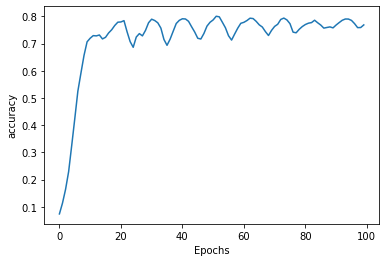

In [39]:
plot_graphs(history, 'accuracy')

In [49]:
seed_text = "I thought i heard the old man say"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I thought i heard the old man say me eye in the month of not gone nor gone by gone nor mans empty praise egg egg here oh goin round the change mary there for gone nor cream one wind and right right right into my love i love i tried to fly me derry i find went still me embarrass still by the hat or does thee youre wind nor fade away from gone by gone gone by and town to tomorrow and fleet home in the presence of my lover by gone by night i rested limbs so high when fulfill gone gone by and ive


---